In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import pickle

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from PIL import Image
from glob import glob
%matplotlib inline

In [2]:
data = np.load('data_pca_50_y_mean.pickle.npz')

In [3]:
data.files

['arr_0', 'arr_1', 'arr_2']

In [4]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [5]:
X.shape

(5456, 50)

In [6]:
# stratify = maintain train proportion, in this case 60-40
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)


In [7]:
#A support vector machine (SVM) is a supervised machine learning model 
#that uses classification algorithms for two-group classification problems. 
#After giving an SVM model sets of labeled training data for each category, 
#they're able to categorize new data.

In [8]:
model = SVC(C=1.0,kernel='rbf', gamma=0.01, probability=True)

In [9]:
model.fit(x_train, y_train)

SVC(gamma=0.01, probability=True)

In [10]:
# training data score
model.score(x_train,y_train)

0.8572410632447296

In [11]:
model.score(x_test,y_test)

0.8086080586080586

In [12]:
pickle.dump(model, open('svc80%.pickle', 'wb'))

# Model Evaluation
- Confusion Matrix
- Classification Report
- Kappa Score
- ROC and AUC


In [13]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

In [14]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [15]:
cm = np.concatenate((cm, cm.sum(axis=0).reshape(1,-1)), axis=0)

In [16]:
cm = np.concatenate((cm, cm.sum(axis=1).reshape(-1,1)), axis=1)

In [17]:
cm

array([[ 307,  134,  441],
       [  75,  576,  651],
       [ 382,  710, 1092]], dtype=int64)

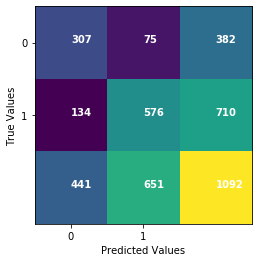

In [18]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j, '%d'%cm[i,j], color='white', fontweight ='bold')
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [19]:
# Classification Report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'], output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.803665,0.696145,0.746051,441.000000
female,0.811268,0.884793,0.846436,651.000000
accuracy,0.808608,0.808608,0.808608,0.808608
macro avg,0.807466,0.790469,0.796244,1092.000000
weighted avg,0.808197,0.808608,0.805896,1092.000000


In [20]:
# Kappa Score good > 60, great > 80
metrics.cohen_kappa_score(y_test,y_pred)

0.59375

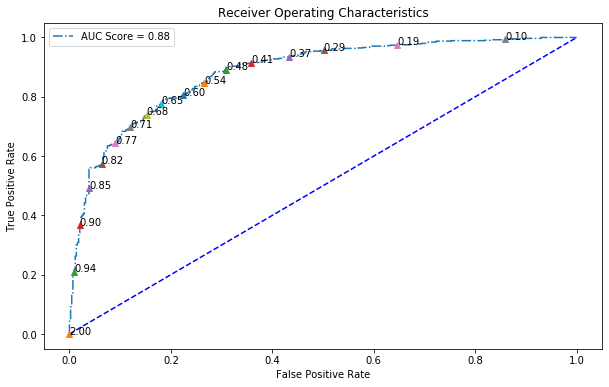

In [21]:
# An ROC curve (receiver operating characteristic curve) is a graph showing 
# the performance of a classification model at all classification thresholds.
# False Positive Rate, True Positive Rate
# Female
fpr, tpr, thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, '-.')
plt.plot([0,1],[0,1], 'b--')
for i in range(0, len(thresh), 20):
    plt.plot(fpr[i], tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

In [22]:
#if you see the mark 0.57 the false positive rate is 20 and the true is 80
# since the default probability is 50% the threshhold 

# AUC stands for "Area under the ROC Curve." That is, AUC measures the 
#entire two-dimensional area underneath the entire ROC curve

In [23]:
model_tune = SVC()

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {'C':[1,10,20,30,50,100], 
              'kernel':['rbf', 'poly'], 
              'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
              'coef0':[0,1]}

In [27]:
#cv = crossvalidation
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy', cv=5, verbose=1)

In [28]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 10.6min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [29]:
model_grid.best_params_

{'C': 1, 'coef0': 0, 'gamma': 0.05, 'kernel': 'rbf'}

In [41]:
model_best = SVC(C=1, gamma=0.05, kernel='rbf', coef0=0, probability=True )

In [42]:
model_best.fit(x_train, y_train)

SVC(C=1, coef0=0, gamma=0.05, probability=True)

In [43]:
model_best.score(x_train,y_train)

0.9862511457378552

In [44]:
model_best.score(x_test,y_test)

0.8141025641025641

In [45]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test)

In [46]:
cm = metrics.confusion_matrix(y_test,y_pred)

cm = np.concatenate((cm, cm.sum(axis=0).reshape(1,-1)), axis=0)

cm = np.concatenate((cm, cm.sum(axis=1).reshape(-1,1)), axis=1)

cm

array([[ 301,  140,  441],
       [  63,  588,  651],
       [ 364,  728, 1092]], dtype=int64)

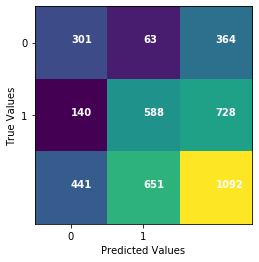

In [47]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j, '%d'%cm[i,j], color='white', fontweight ='bold')
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [50]:
# Classification Report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'], output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.826923,0.682540,0.747826,441.000000
female,0.807692,0.903226,0.852792,651.000000
accuracy,0.814103,0.814103,0.814103,0.814103
macro avg,0.817308,0.792883,0.800309,1092.000000
weighted avg,0.815459,0.814103,0.810402,1092.000000


In [51]:
# Kappa Score good > 60, great > 80
metrics.cohen_kappa_score(y_test,y_pred)

0.6027397260273972

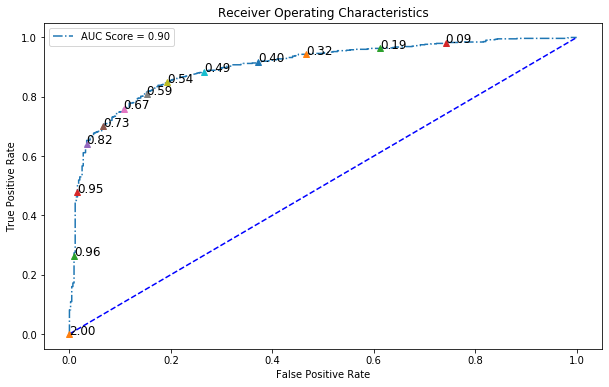

In [67]:
# An ROC curve (receiver operating characteristic curve) is a graph showing 
# the performance of a classification model at all classification thresholds.
# False Positive Rate, True Positive Rate
# Female
fpr, tpr, thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, '-.')
plt.plot([0,1],[0,1], 'b--')
for i in range(0, len(thresh), 25):
    plt.plot(fpr[i], tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i], size='large')
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

In [66]:
count = 0
for i in tpr:
    count += 1
    print(count, ': ', i)

1 :  0.0
2 :  0.0015360983102918587
3 :  0.053763440860215055
4 :  0.059907834101382486
5 :  0.08141321044546851
6 :  0.08141321044546851
7 :  0.10906298003072197
8 :  0.10906298003072197
9 :  0.11213517665130568
10 :  0.1152073732718894
11 :  0.1443932411674347
12 :  0.14746543778801843
13 :  0.1597542242703533
14 :  0.1597542242703533
15 :  0.17204301075268819
16 :  0.17204301075268819
17 :  0.17357910906298002
18 :  0.17665130568356374
19 :  0.1858678955453149
20 :  0.1889400921658986
21 :  0.19508448540706605
22 :  0.19815668202764977
23 :  0.22427035330261136
24 :  0.2304147465437788
25 :  0.261136712749616
26 :  0.2642089093701997
27 :  0.27035330261136714
28 :  0.27342549923195086
29 :  0.2749615975422427
30 :  0.29339477726574503
31 :  0.2964669738863287
32 :  0.2980030721966206
33 :  0.3010752688172043
34 :  0.3195084485407066
35 :  0.3225806451612903
36 :  0.3271889400921659
37 :  0.3302611367127496
38 :  0.35023041474654376
39 :  0.3533026113671275
40 :  0.36251920122887865


In [52]:
pickle.dump(model_best, open('model_svm.pickle','wb'))

In [53]:
pickle.dump(model_best, open('mean_preprocess.pickle','wb'))